In [2]:
%matplotlib inline
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

import cfilt

# Generate filter coefficients

In [3]:
fs = 600.0
nyq = fs/2

wp = (0,0.05)
ws = (0.5,10)
gpass= 0.5
gstop= 60

filt = signal.iirdesign(wp[1]/nyq, ws[0]/nyq, gpass, gstop, analog=False, ftype='ellip', output='sos')

In [4]:
print(filt)

[[  4.41741692e-06   4.41741692e-06   0.00000000e+00   1.00000000e+00
   -9.99668440e-01   0.00000000e+00]
 [  1.00000000e+00  -1.99998824e+00   1.00000000e+00   1.00000000e+00
   -1.99967696e+00   9.99677275e-01]]


# Create Cfilt.Filter64 instance

In [5]:
filtIndex64 = cfilt.filter64_init(filt.astype('float64'))
filtIndex32 = cfilt.filter32_init(filt.astype('float32'))

# Create input data

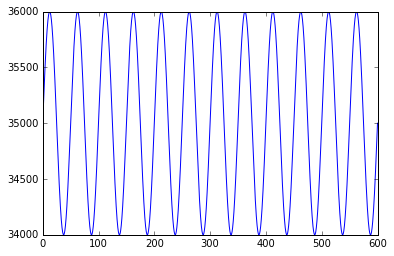

In [6]:
T = 600
fs = 600
f1 = 0.02
a = 1000
offset = 35000
t = np.arange(0, T, 1/fs)
x = offset + a*np.sin(2*np.pi*f1*t, dtype='float32')

plt.plot(t,x)

# Filter data with cfilt

In [7]:
y64 = cfilt.filter64_apply(filtIndex64, x.astype('float64'))
y32 = cfilt.filter32_apply(filtIndex32, x.astype('float32'))

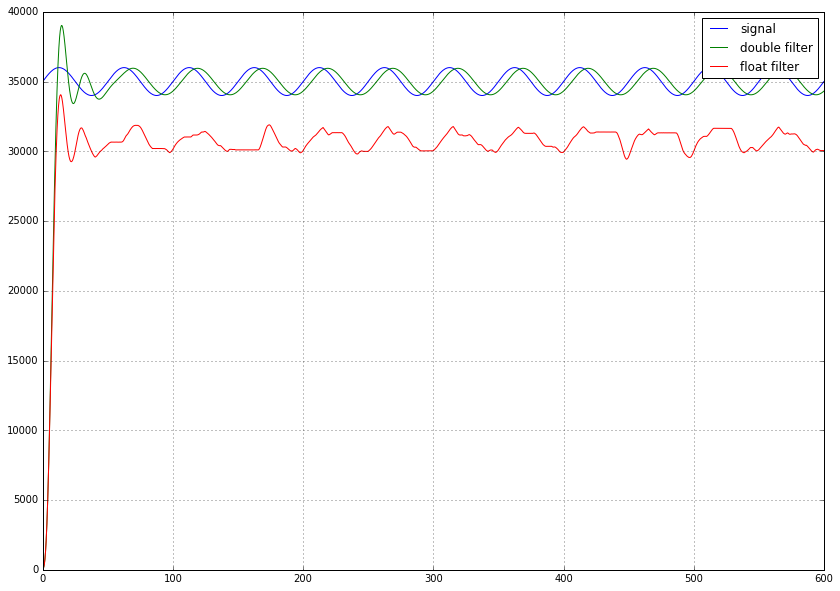

In [8]:
plt.figure(figsize=(14,10))
plt.plot(t,x, label='signal')
plt.plot(t,y64, label='double filter')
plt.plot(t,y32, label='float filter')
plt.legend()
plt.grid()
plt.show()

# Other example

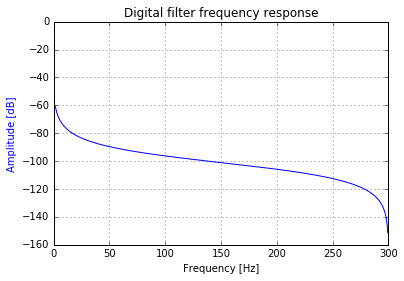

In [16]:
fs = 600.0
nyq = fs/2

wp = (0,0.1)
ws = (1,20)
gpass= 0.5
gstop= 60

filt = signal.iirdesign(wp[1]/nyq, ws[0]/nyq, gpass, gstop, analog=False, ftype='ellip', output='sos')


i = cfilt.filter32_init(filt.astype('float32'))
j = cfilt.filter64_init(filt.astype('float64'))


b,a = signal.iirdesign(wp[1]/nyq, ws[0]/nyq, gpass, gstop, analog=False, ftype='ellip', output='ba')
w,h = signal.freqz(b, a)
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)

plt.plot(w / np.pi * nyq, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [Hz]')
plt.grid()

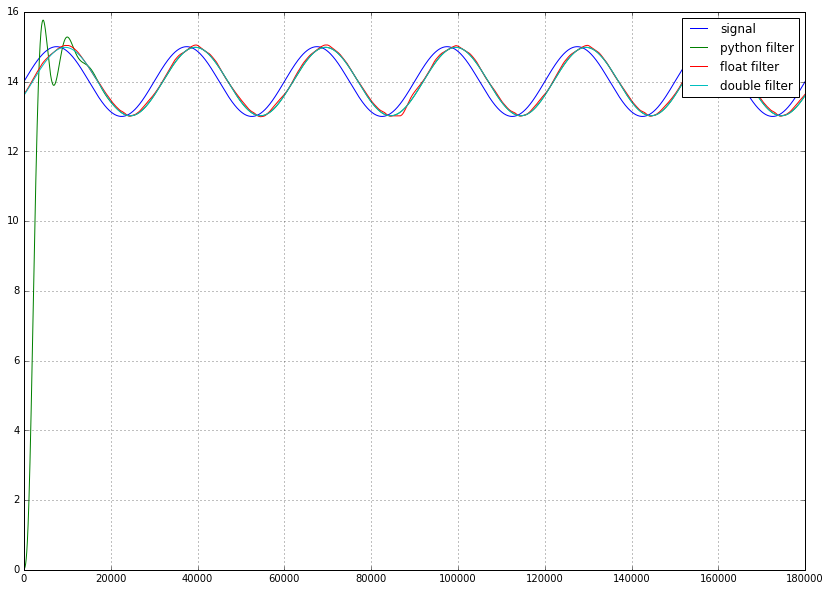

In [20]:
T = 300
fs = 600
f1 = 0.02
t = np.arange(0, T, 1/fs)

o = 14


x = o+np.sin(2*np.pi*f1*t)
y = cfilt.filter32_apply(i, x.astype('float32'))
y2 = cfilt.filter64_apply(j, x.astype('float64'))

y3 = signal.lfilter(b,a,x)


plt.figure(figsize=(14,10))
plt.plot(x, label="signal")
plt.plot(y3, label='python filter')
plt.plot(y, label='float filter')
plt.plot(y2, label='double filter')

plt.legend()
plt.grid()